# Cellphone churn dataset

---

This dataset, located in the `cell_phone_churn` folder, is a dataset containing information on the cell phone "churn rates" for people in different states

The columns are described:
    
    state: state
    account_length: days in account
    area_code: phone area code
    intl_plan: international plan vs. not
    vmail_plan: voicemail plan vs. not
    vmail_message: how many voicemail messages
    day_mins: number of day mins
    day_calls: number of day calls
    day_charge: day call charge
    eve_mins: number of evening call mins
    eve_calls: number of evening calls
    eve_charge: evening call charge
    night_mins: number of night minutes
    night_calls: number of night calls
    night_charge: charge for night calls
    intl_mins: number of international calls
    intl_calls: international call minutes
    intl_charge: charge for international calls
    custserv_calls: how many customer service calls
    churn: churned vs not
    
The implied variable of interest here is the churn. You will want to subset by churn and look at different variables, probably plotting in different colors variables on the same plot. 
---

### Requirements

As a group you should:

1. Load and clean, if neccessary, the data with pandas.
2. Identify variables and subsets of the data your are interested in as a group.
2. Describe the data and investigate any outliers for those variables.
3. Explore relationships between variables.
4. Visualize at least three variables of your choice with appropriate visualizations. They should be readable.
5. Visualize subsets of the variables you chose, subsetted conditional on some other variable. For example, number of customer service calls by churn rate.
6. Write a brief report on at least 5 things you found interesting about the data or, if it doesn't interest you at all, things you found out and why they are boring.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

#%config InlineBackend.figure_format = 'retina'
%matplotlib inline

cell_file = '/Users/katbishop/Desktop/DSI-SF2-bishopkd/datasets/cell_phone_churn/cell_phone_churn.csv'
cell = pd.read_csv(cell_file)

In [10]:
print cell.head(4)
print cell.info()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False


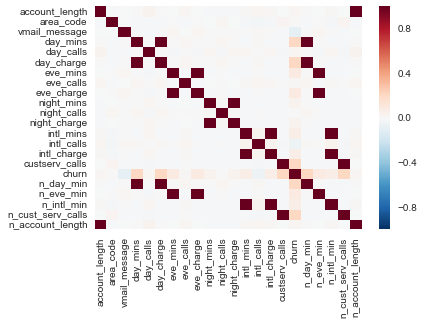

In [120]:
churn_t = (cell.churn==True)
churn_f = (cell.churn==False)

churn_true = cell.loc[churn_t,:]
churn_false = cell.loc[churn_f,:]


cell.corr()
#cell.loc[churn_true,:].head(3)
sns.heatmap(cell.corr())

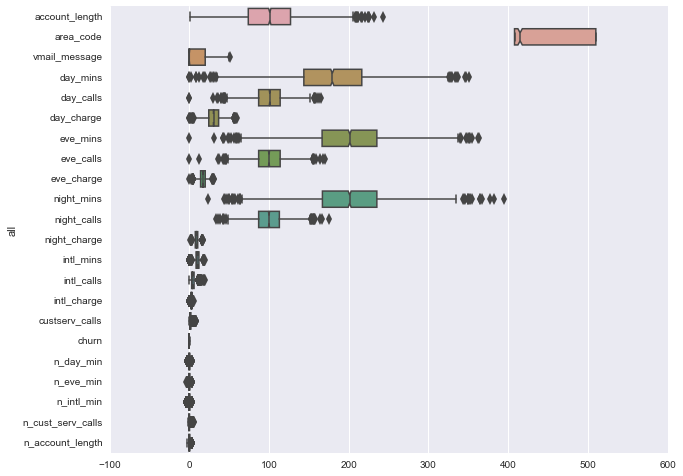

In [93]:
# fig = plt.figure(figsize =(8,7))
# ax = fig.gca()

# ax = sns.distplot(cell['churn'], bins=30, kde=False)
# plt.show()

# ax = sns.distplot(cell['custserv_calls'], bins=30, kde=False)
# plt.show()

# ax = sns.distplot(cell['day_mins'], bins=30, kde=False)
# plt.show()

# cell.hist('custserv_calls')
# cell.hist('day_mins')
# sns.pairplot(cell[['day_mins','custserv_calls'],churn_true])

fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax = sns.boxplot(cell, orient='h',fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)
ax.set_ylabel('all')
ax.set_title('\n', fontsize=16)
plt.show()


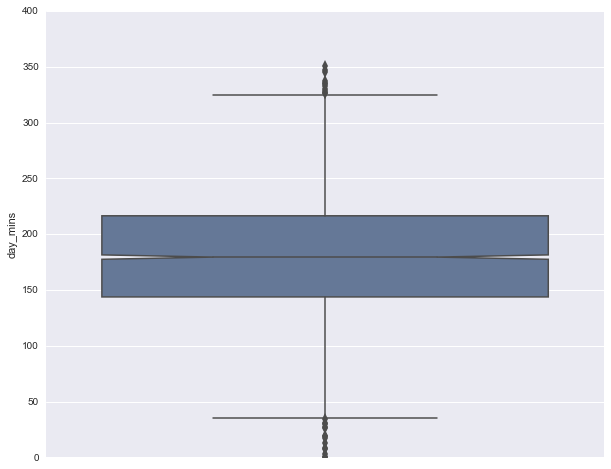

In [34]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax = sns.boxplot(cell.day_mins, orient='v',fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)
ax.set_ylabel('day_mins')
ax.set_title('\n', fontsize=16)
plt.show()

In [ ]:
churn_left_mask = (cell. > True)

In [89]:
#Also adds normalized columns for the minutes column and the cust service call
cell['n_day_min'] = (cell.day_mins - cell.day_mins.mean())/cell.day_mins.std()
cell['n_eve_min'] = (cell.eve_mins - cell.eve_mins.mean())/cell.eve_mins.std()
cell['n_intl_min'] =  (cell.intl_mins - cell.intl_mins.mean())/cell.intl_mins.std()
cell['n_cust_serv_calls'] = (cell.custserv_calls - cell.custserv_calls.mean())/cell.custserv_calls.std()
cell['n_account_length'] = (cell.account_length - cell.account_length.mean())/cell.account_length.std()

#Create two subsets of data. One where customers have left (cust_go) and one where customers have stayed(cust_stay)
churn_left_mask = (cell.churn == True)
churn_stay_mask = (cell.churn == False)

cust_go = cell[churn_left_mask]
cust_stay = cell[churn_stay_mask]



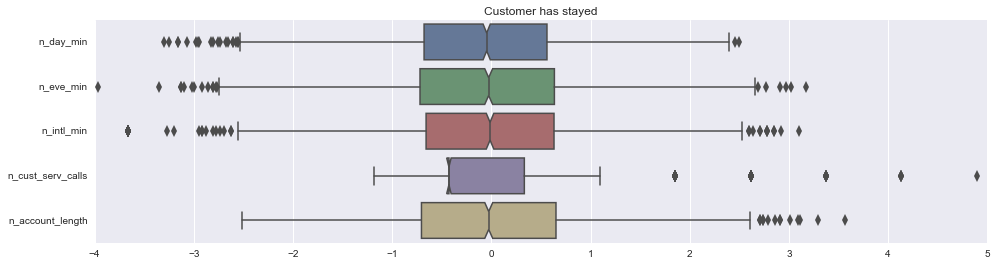

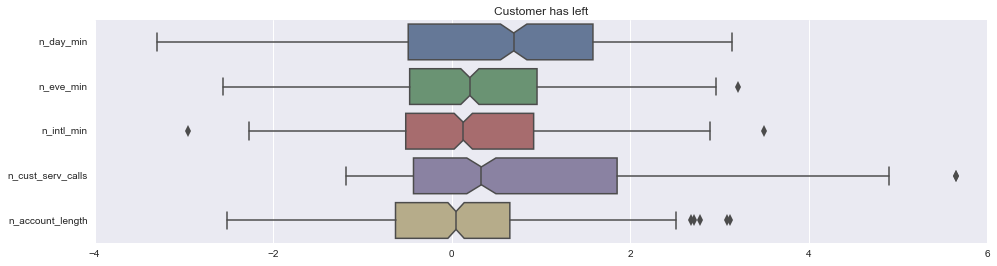

In [90]:
fig = plt.figure(figsize=(16,4))
ax = fig.gca()
ax = sns.boxplot(data=cust_stay[['n_day_min','n_eve_min','n_intl_min','n_cust_serv_calls','n_account_length']], orient='h',fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)
ax.set_title('Customer has stayed')
plt.show()

fig = plt.figure(figsize=(16,4))
ax = fig.gca()
ax = sns.boxplot(data=cust_go[['n_day_min','n_eve_min','n_intl_min','n_cust_serv_calls','n_account_length']], orient='h',fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)
ax.set_title('Customer has left')
plt.show()

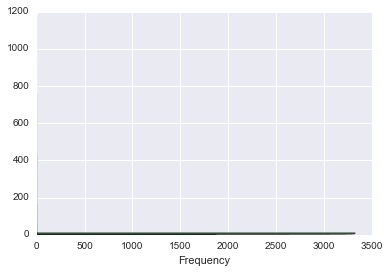

In [57]:
fig = plt.figure()
ax = fig.gca()

ax = sns.distplot(cell['custserv_calls'], bins=30, kde=False)


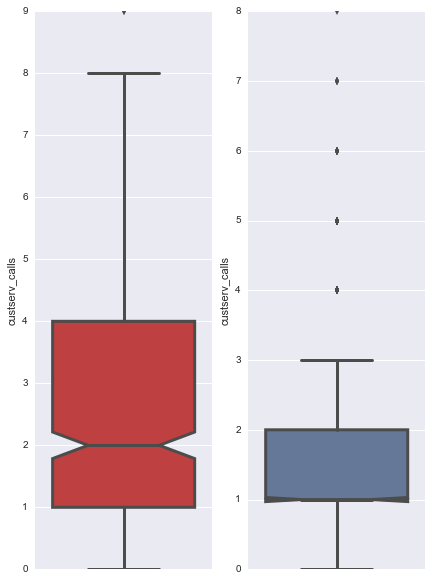

In [63]:
# if we did 2 rows, 2 cols, like so:
# fig, axes_array = plt.subplots(2, 2, figsize=(15,7))
# axes_array is now 2-dimensional, so:
# top left axis: axes_array[0,0]
# top right axis: axes_array[0,1]
# bottom left axis: axes_array[1,0]
# bottom right axis: axes_array[1,1]


fig, axes_array = plt.subplots(1, 2, figsize=(7,10))


sns.boxplot(churn_true['custserv_calls'],
           orient='v', fliersize =5, linewidth=3, notch=True, saturation= 0.5, 
           ax=axes_array[0], color='red',)


sns.boxplot(churn_false['custserv_calls'],
           orient='v', fliersize =5, linewidth=3, notch=True, saturation= 0.5, 
           ax=axes_array[1])
plt.show()

In [101]:
max_test_t = max(cust_stay.custserv_calls)
max_test_t

8

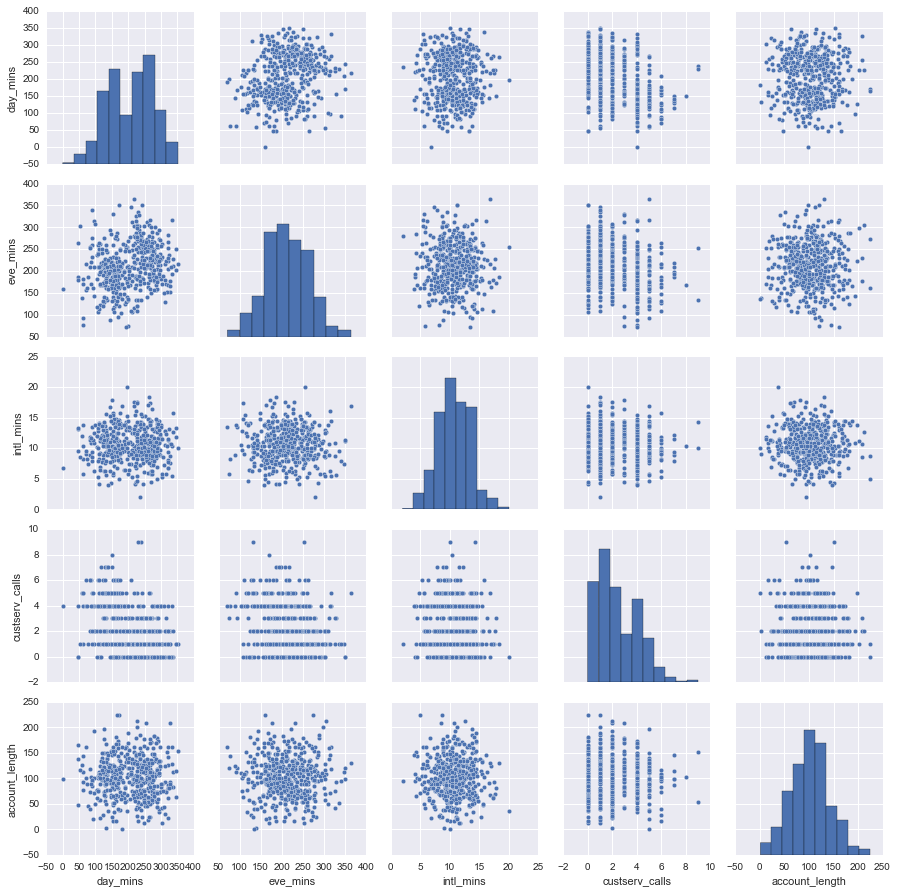

In [121]:


sns.pairplot(cust_go[['day_mins','eve_mins','intl_mins','custserv_calls', 'account_length']])